# Project Demo

In [26]:
import random

import numpy as np
from matplotlib import pyplot as plt

from source.portfolio import Portfolio
from source.utils import calc_var
from source.utils import calc_es

In [2]:
random.seed(42)

### Initialize portfolio

In [3]:
portfolio = Portfolio(
    start_date='2023-12-02',
    investing_amounts={
        'bonds': 10e6,  # 5 bonds
        'stocks': 1e6,  # 10 stocks
        'fx': 100e6,  # 2 currency pairs
    },
    max_relative_error=0.1,  # 10% deviation from target weight 
)

/Users/sd-denisoff/Desktop/GitHub/hse/2023-2024/Risks/portfolio-risk/venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.933e+06, tolerance: 9.037e+04
  model = cd_fast.enet_coordinate_descent(


In [4]:
print(f'Total portfolio size: {portfolio.total_amount // 1e6} mln')

Total portfolio size: 260.0 mln


In [5]:
np.isclose(
    portfolio.target_weights['bonds'] * 5
    + portfolio.target_weights['stocks'] * 10
    + portfolio.target_weights['fx'] * 2,
    1
)

True

In [6]:
portfolio.get_last_price('GAZP')

162.61

### Rebalance portfolio

In [7]:
portfolio.all_instruments

{'bonds': {'SU26218RMFS6': 0,
  'SU26221RMFS0': 0,
  'SU26222RMFS8': 0,
  'SU26224RMFS4': 0,
  'SU26230RMFS1': 0},
 'stocks': {'GAZP': 0,
  'GMKN': 0,
  'LKOH': 0,
  'MAGN': 0,
  'MGNT': 0,
  'MOEX': 0,
  'ROSN': 0,
  'RUAL': 0,
  'SBER': 0,
  'VTBR': 0},
 'fx': {'USD_RUB': 0, 'EUR_RUB': 0}}

In [8]:
portfolio.is_rebalancing_needed()

True

In [9]:
portfolio.rebalance_portfolio()

In [10]:
portfolio.all_instruments

{'bonds': {'SU26218RMFS6': 1180,
  'SU26221RMFS0': 1278,
  'SU26222RMFS8': 1042,
  'SU26224RMFS4': 1213,
  'SU26230RMFS1': 1382},
 'stocks': {'GAZP': 6149,
  'GMKN': 6007,
  'LKOH': 139,
  'MAGN': 19790,
  'MGNT': 156,
  'MOEX': 5027,
  'ROSN': 1738,
  'RUAL': 27207,
  'SBER': 3650,
  'VTBR': 42354934},
 'fx': {'USD_RUB': 1128898.79, 'EUR_RUB': 1032176.02}}

### Simulations

In [11]:
simulations = portfolio.risk_factors.simulate_all(n_days=10, n_sim=50)

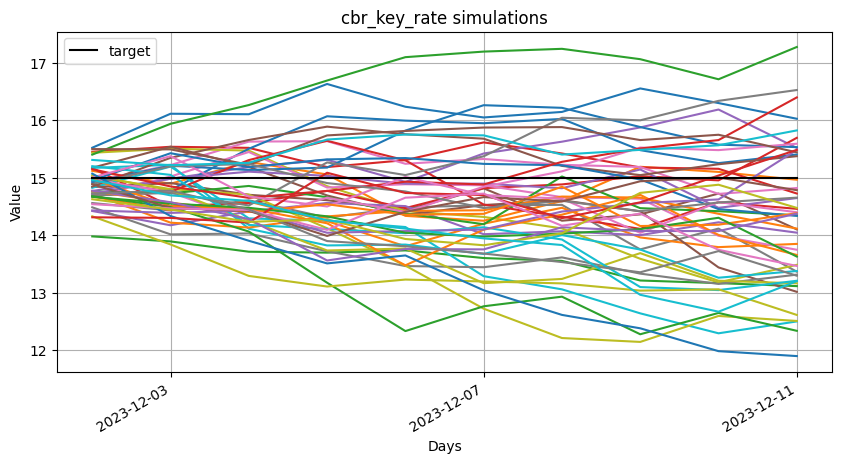

In [12]:
portfolio.risk_factors.plot_simulations(
    simulations=simulations['cbr_key_rate'],
    risk_factor='cbr_key_rate',
)

In [13]:
portfolio.risk_factors.plot_simulations(
    simulations=simulations['pca_cbd'],
    risk_factor='pca_cbd',
)

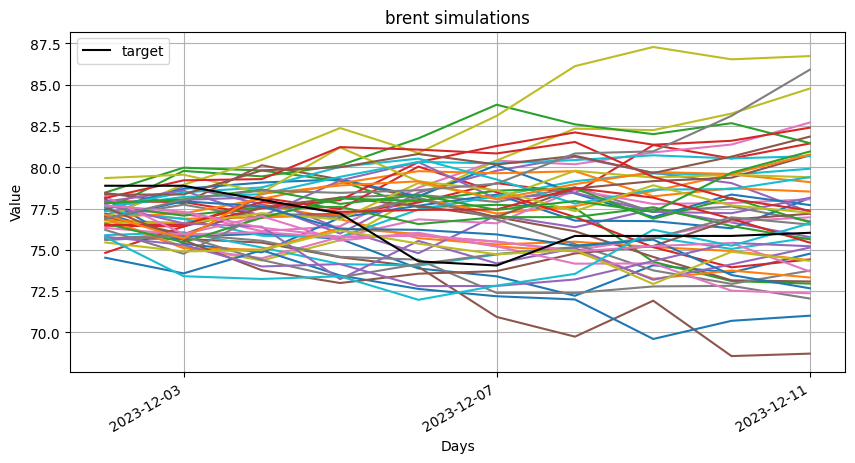

In [14]:
portfolio.risk_factors.plot_simulations(
    simulations=simulations['brent'],
    risk_factor='brent',
)

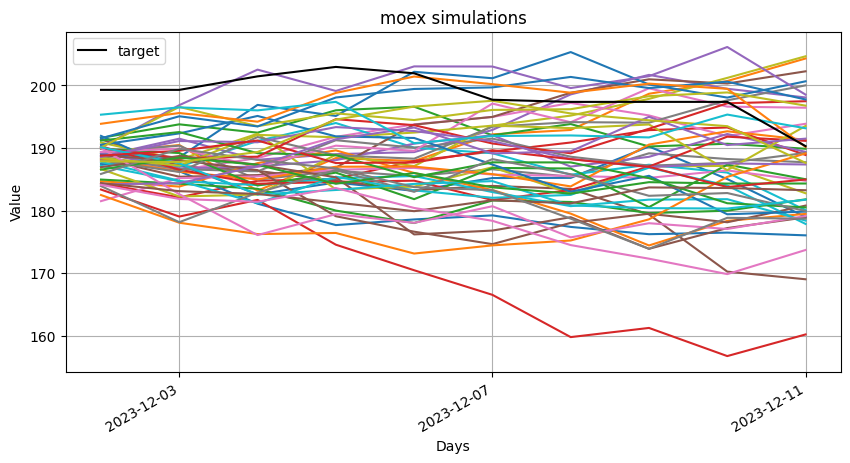

In [15]:
portfolio.risk_factors.plot_simulations(
    simulations=simulations['moex'],
    risk_factor='moex',
)

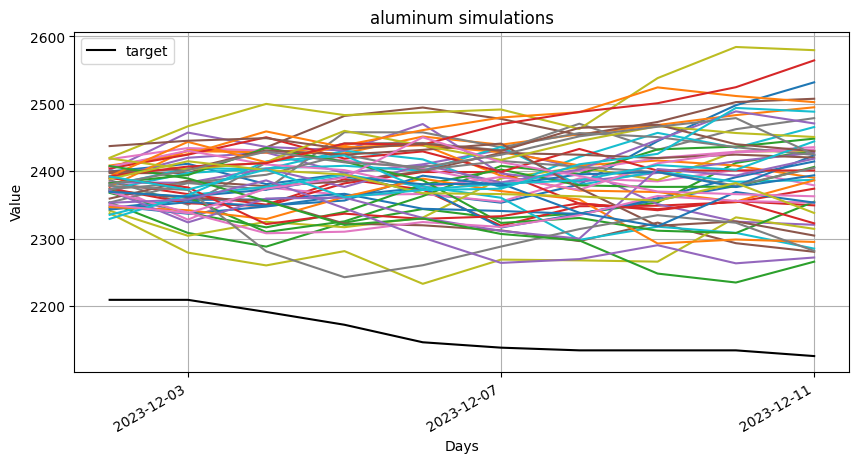

In [16]:
portfolio.risk_factors.plot_simulations(
    simulations=simulations['aluminum'],
    risk_factor='aluminum',
)

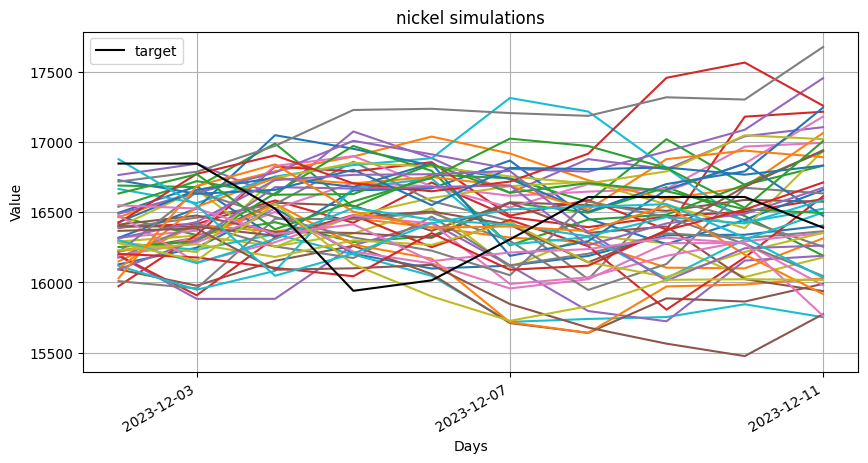

In [17]:
portfolio.risk_factors.plot_simulations(
    simulations=simulations['nickel'],
    risk_factor='nickel',
)

### Instruments fair value

In [18]:
portfolio.risk_factors.predict_prices(
    n_days=1,
    n_sim=50,
)

[{'GAZP': 203.37537569478192,
  'GMKN': 185.8188730341185,
  'LKOH': 9130.803559458418,
  'MAGN': 52.40891195463456,
  'MGNT': 38779.94281908816,
  'MOEX': -132.6965958014969,
  'ROSN': 1710.8980789593836,
  'RUAL': 48.071399674670644,
  'SBER': 254.06745249448642,
  'VTBR': 0.03405280269962551,
  'SU26218RMFS6': 95.33672963455248,
  'SU26221RMFS0': 88.6028269201498,
  'SU26222RMFS8': 99.2436093762252,
  'SU26224RMFS4': 89.09393312203977,
  'SU26230RMFS1': 85.12190306277897},
 {'GAZP': 207.50291607667273,
  'GMKN': 185.9869772356755,
  'LKOH': 40488.20023765871,
  'MAGN': 51.733768422848,
  'MGNT': 456882.0203133694,
  'MOEX': -3712.8077399699414,
  'ROSN': 16279.190175472833,
  'RUAL': 48.57207340195524,
  'SBER': 250.02244952396973,
  'VTBR': 0.03365395219067975,
  'SU26218RMFS6': 96.01928933400323,
  'SU26221RMFS0': 89.27830423066553,
  'SU26222RMFS8': 99.3855329438089,
  'SU26224RMFS4': 89.57987848215875,
  'SU26230RMFS1': 85.96083780762025},
 {'GAZP': 200.9330449230525,
  'GMKN': 

### Portfolio risk metrics

1 day prediction

In [31]:
fvalue_dist = portfolio.simulate_fair_value_dist(
    n_days=1,
    n_sim=100,
)

In [32]:
level = 99
var = calc_var(fvalue_dist, level=level)
print(f"VaR {level}%: {var:_.2f}")

VaR 99%: 200_851_144.07


In [33]:
level = 97.5
es = calc_es(fvalue_dist, level=level)
print(f"Expected Shortfall {level}%: {es:_.2f}")

Expected Shortfall 97.5%: 200_021_591.12


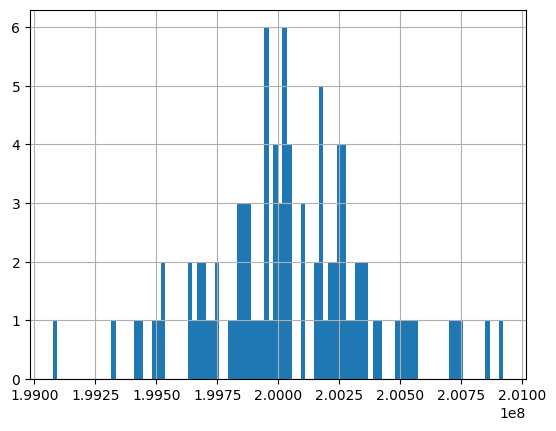

In [34]:
plt.hist(fvalue_dist, bins=100)
plt.grid()

10 days prediction

In [80]:
fvalue_dist_bad = portfolio.simulate_fair_value_dist(
    n_days=10,
    n_sim=100,
)

In [81]:
fvalue_dist = fvalue_dist_bad[fvalue_dist_bad > np.quantile(fvalue_dist_bad, 0.3)]

In [82]:
level = 99
var = -calc_var(-fvalue_dist, level=level)
print(f"VaR {level}%: {var:_.2f}")

VaR 99%: -732_766_616_302_413_824.00


In [83]:
level = 97.5
es = calc_es(fvalue_dist, level=level)
print(f"Expected Shortfall {level}%: {es:_.2f}")

Expected Shortfall 97.5%: 30_253_622_890_623_451_136.00


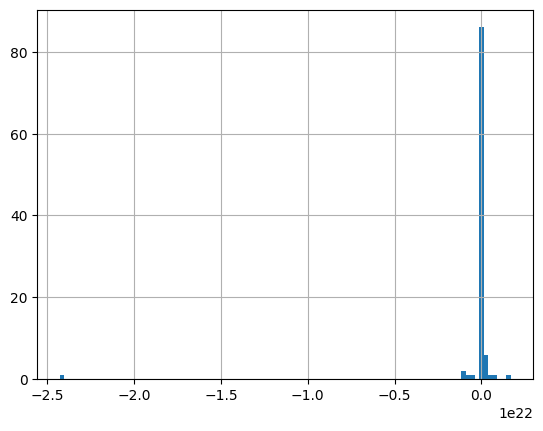

In [38]:
plt.hist(fvalue_dist, bins=100)
plt.grid()